# MNIST DATA with Softmax Regression

## 1. Import Packages

In [3]:
import input_data
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

## 2. Explore MNIST Data

In [4]:
mnist_images = input_data.read_data_sets("./mnist_data", one_hot=False)

Extracting ./mnist_data\train-images-idx3-ubyte.gz
Extracting ./mnist_data\train-labels-idx1-ubyte.gz
Extracting ./mnist_data\t10k-images-idx3-ubyte.gz
Extracting ./mnist_data\t10k-labels-idx1-ubyte.gz


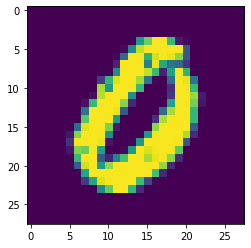

In [5]:
#  Example of a picture
pic,real_values = mnist_images.train.next_batch(25)

index = 11 # changeable with 0 ~ 24 integer
image = pic[index,:]
image = np.reshape(image,[28,28])
plt.imshow(image)
plt.show()

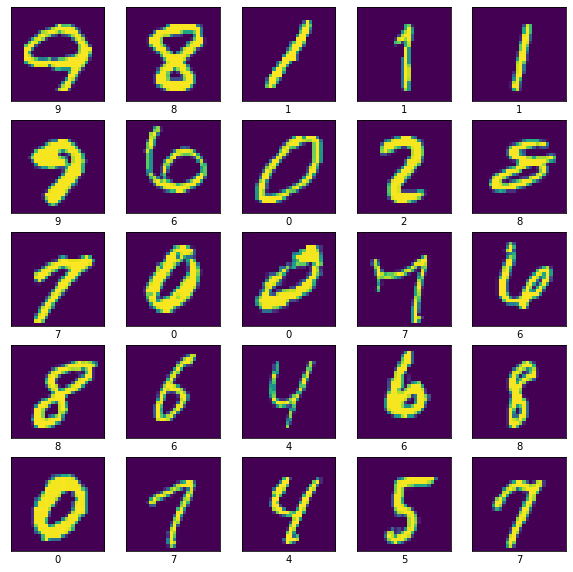

In [6]:
# Explore MNIST data

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(pic[i,:] , [28,28])
    plt.imshow(image)
    plt.xlabel(real_values[i])
plt.show()

## 3. Make Dataset

In [8]:
# Download Data : http://yann.lecun.com/exdb/mnist/
# Data input script : https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist

mnist = input_data.read_data_sets("./samples/MNIST_data/", one_hot=True)

Extracting ./samples/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./samples/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
print("the number of train examples :" , mnist.train.num_examples)
print("the number of test examples :" , mnist.test.num_examples)

the number of train examples : 55000
the number of test examples : 10000


## 4. Building my neural network in tensorflow

In [10]:
# Create placeholders
x = tf.placeholder(tf.float32, [None, 784])

# Initialize parameters
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [11]:
# Forward Propagation
y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])

# Compute cost
cross_entropy = - tf.reduce_sum(y_*tf.log(y))

# Backward Propagation
learning_rate = 0.01
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [12]:
# Initialize all the variables
init = tf.global_variables_initializer()

# Start the session to compute the tensorflow graph
sess = tf.Session()
sess.run(init)

Cost after epoch 0: 2.302585
Cost after epoch 100: 0.404834
Cost after epoch 200: 0.311833
Cost after epoch 300: 0.400095
Cost after epoch 400: 0.425476
Cost after epoch 500: 0.304436
Cost after epoch 600: 0.360333
Cost after epoch 700: 0.343522
Cost after epoch 800: 0.481958
Cost after epoch 900: 0.346336


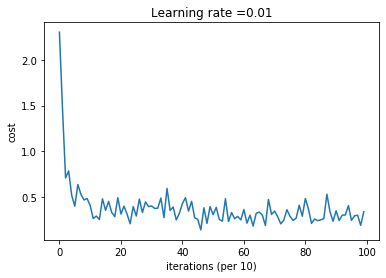

In [13]:
# Do the training loop - Stochastic training
batch_size = 100
epoch_cost = 0
costs = []

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)     # 100 random data
    _ , minibatch_cost = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
    epoch_cost = minibatch_cost / batch_size
    
    # Print the cost every epoch
    if i % 100 == 0:
        print ("Cost after epoch %i: %f" % (i, epoch_cost))
    if  i % 10 == 0:
        costs.append(epoch_cost)
        
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per 10)')
plt.title("Learning rate =" + str(0.01))
plt.show()        

## 5. Calculate Accuracy

In [14]:
# Validation
# Calculate the correct predictions
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Accuracy
print("Train Accuracy : " , sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels}))
print("Test Accuracy : " , sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Train Accuracy :  0.91818184
Test Accuracy :  0.9189


## 6. Check wrong prediction

In [15]:
w = []
for r in range(1000):
    if sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)) != sess.run (tf.argmax(y, 1), feed_dict={x: mnist.test.images[r:r+1]}):
        w.append(r)

In [16]:
print("wrong label : " ,w)

wrong label :  [8, 33, 63, 66, 77, 92, 124, 149, 193, 195, 211, 233, 235, 241, 245, 247, 259, 290, 300, 320, 321, 340, 352, 359, 362, 381, 389, 406, 412, 417, 444, 445, 448, 449, 464, 469, 478, 479, 488, 502, 507, 511, 531, 536, 542, 543, 551, 565, 569, 578, 582, 591, 619, 628, 629, 658, 659, 674, 684, 691, 692, 707, 717, 720, 740, 741, 760, 766, 791, 839, 844, 857, 866, 877, 881, 882, 898, 924, 938, 939, 950, 951, 956, 965, 982, 999]


In [17]:
wrong_pred = []
for i in range(len(w)) : 
    wrong_pred.append(sess.run (tf.argmax(y, 1), feed_dict={x: mnist.test.images[w[i]:w[i]+1]}))

In [18]:
wrong_label = []
for i in range(len(w)) : 
    wrong_label.append(sess.run(tf.argmax(mnist.test.labels[w[i]:w[i]+1], 1)))

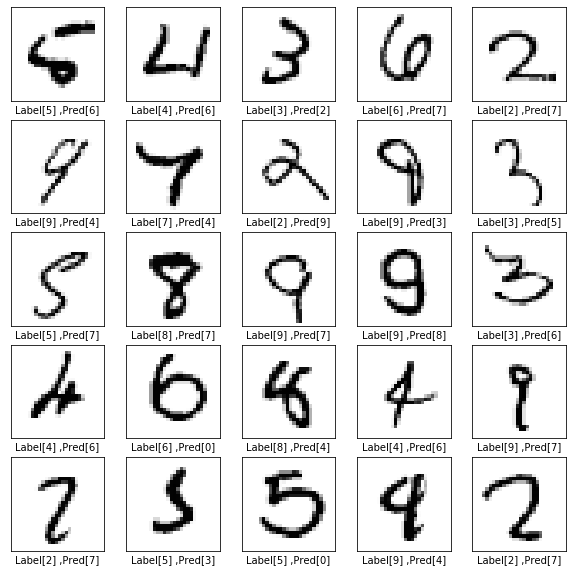

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist.test.images[w[i]].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.xlabel("Label" + str(wrong_label[i]) + " ,Pred" +str(wrong_pred[i]))
plt.show()